In [1]:
!apt-get install openjdk-8-jdk-headless

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 144 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libxtst6 amd64 2:1.2.3-1 [12.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 openjdk-8-jre-headless amd64 8u372-ga~us1-0ubuntu1~20.04 [28.3 MB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 openjdk-8-jdk-headless amd64 8u372-ga~us1-0ubuntu1~20.04 [8,282 kB]
Fetched 

In [2]:
!wget https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz

--2023-05-19 02:22:52--  https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 138.201.131.134, 2a01:4f8:172:2ec5::2
Connecting to archive.apache.org (archive.apache.org)|138.201.131.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272637746 (260M) [application/x-gzip]
Saving to: ‘spark-3.2.1-bin-hadoop2.7.tgz’

spark-3.2.1-bin-had 100%[===================>] 260.01M  19.7MB/s    in 14s     

2023-05-19 02:23:07 (18.3 MB/s) - ‘spark-3.2.1-bin-hadoop2.7.tgz’ saved [272637746/272637746]



In [3]:
!tar xf spark-3.2.1-bin-hadoop2.7.tgz

In [4]:
!pip install -q findspark

In [5]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"

In [6]:
import findspark
findspark.init()
findspark.find()

'/content/spark-3.2.1-bin-hadoop2.7'

In [7]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("EDA_FLAMINGO")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [8]:
from pyspark.sql.functions import col, when

In [9]:
from pyspark.sql import SparkSession

In [10]:
spark

In [11]:
import matplotlib.pyplot as plt


In [12]:
import pandas as pd

In [14]:
#Load the datasets
df_adclicks = spark.read.csv("ad-clicks.csv", header=True, inferSchema=True)
df_buyclicks = spark.read.csv("buy-clicks.csv", header=True, inferSchema=True)
df_gameclicks = spark.read.csv("game-clicks.csv", header=True, inferSchema=True)
df_level = spark.read.csv("level-events.csv", header=True, inferSchema=True)
df_teamassignments = spark.read.csv("team-assignments.csv", header=True, inferSchema=True)
df_team = spark.read.csv("team.csv", header=True, inferSchema=True)
df_usersession = spark.read.csv("user-session.csv", header=True, inferSchema=True)
df_users = spark.read.csv("users.csv", header=True, inferSchema=True)

#using flamingo & combined datasets for EDA
# flamingo is a collection of datasets, we are going to combine all the datasets into 1
# spark is going to be used for machine learning using mlib 
# spark will be used for graph analysis using the graphx 

In [15]:
unique_adclick= df_adclicks.groupBy('adCategory').count().orderBy(col('count').desc())
unique_adclick.show()

+-----------+-----+
| adCategory|count|
+-----------+-----+
|  computers| 2638|
|      games| 2601|
|   clothing| 2340|
|     sports| 2074|
|    fashion| 1727|
|     movies| 1692|
|   hardware| 1588|
|electronics| 1097|
| automotive|  566|
+-----------+-----+



below shows ad category with most clicks

In [ ]:
unique_adclick= df_adclicks.groupBy('adCategory').count().orderBy(col('count').desc()).toPandas()

plt.figure(figsize=(8, 8))
plt.pie(unique_adclick['count'], labels=unique_adclick['adCategory'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('AD CATEGORIES')
plt.show()

In [ ]:
unique_adidclick= df_adclicks.groupBy('adId').count().orderBy(col('count').desc())
unique_adidclick.show()

In [ ]:
unique_adidclick = df_adclicks.groupBy('adId').count().orderBy(col('count').desc()).toPandas()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(unique_adidclick['adId'], unique_adidclick['count'])
plt.xlabel('AD ID')
plt.ylabel('Count')
plt.title('AD CLICKS')
plt.xticks(rotation=90)
plt.show()

below displays the user with most ad clicks

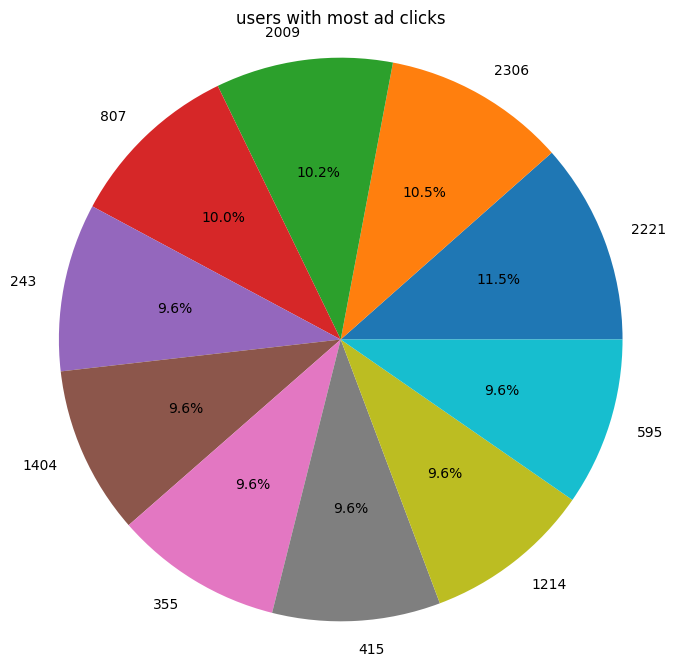

In [21]:
user_counts = df_adclicks.groupBy('userId').count().orderBy(col('count').desc()).toPandas()

top_10_user_clicks = user_counts.head(10)

plt.figure(figsize=(8, 8))
plt.pie(top_10_user_clicks['count'], labels=top_10_user_clicks['userId'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('users with most ad clicks')
plt.show()

below will display hit count

In [ ]:
unique_hits= df_gameclicks.groupBy('isHit').count().orderBy(col('count').desc())
unique_hits.show()

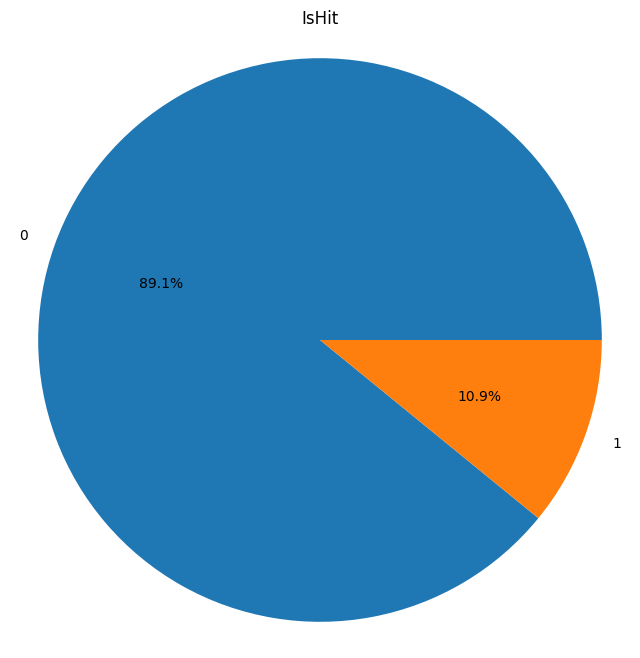

In [23]:
unique_hits= df_gameclicks.groupBy('isHit').count().orderBy(col('count').desc()).toPandas()

plt.figure(figsize=(8, 8))
plt.pie(unique_hits['count'], labels=unique_hits['isHit'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('IsHit')
plt.show()

below will display  teams with most buy

In [24]:
count_teams_most_buys= df_buyclicks.groupBy('team').count().orderBy(col('count').desc())
count_teams_most_buys.show()

+----+-----+
|team|count|
+----+-----+
|  27|  101|
|  64|  100|
|   9|   98|
|  35|   94|
|  54|   89|
|  72|   88|
|  22|   86|
|  53|   86|
|  99|   79|
|  66|   79|
|  18|   78|
|  97|   76|
|  51|   68|
|  11|   64|
|  59|   61|
|  20|   60|
|  84|   59|
|  13|   55|
|  63|   52|
|  77|   50|
+----+-----+
only showing top 20 rows



In [25]:
count_teams_most_buys = df_buyclicks.groupBy('team').count().orderBy(col('count').desc()).toPandas()


In [26]:
top_10_teams_mostbuys= count_teams_most_buys.head(10)

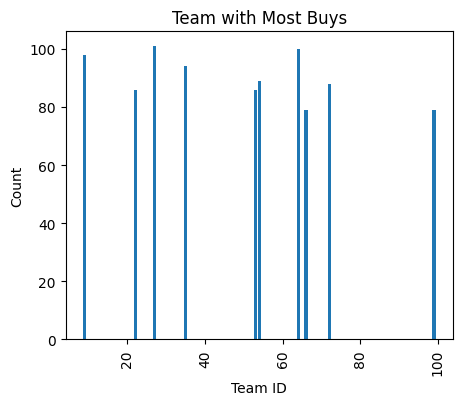

In [27]:
# Plot the bar chart
plt.figure(figsize=(5, 4))
plt.bar(top_10_teams_mostbuys['team'], top_10_teams_mostbuys['count'])
plt.xlabel('Team ID')
plt.ylabel('Count')
plt.title('Team with Most Buys')
plt.xticks(rotation=90)
plt.show()

we will find out most purchased item

In [28]:
count_items_purchased= df_buyclicks.groupBy('buyid').count().orderBy(col('count').desc())
count_items_purchased.show()

+-----+-----+
|buyid|count|
+-----+-----+
|    2|  714|
|    5|  610|
|    0|  592|
|    4|  425|
|    3|  337|
|    1|  269|
+-----+-----+



In [29]:
count_items_purchased = df_buyclicks.groupBy('buyid').count().orderBy(col('count').desc()).toPandas()


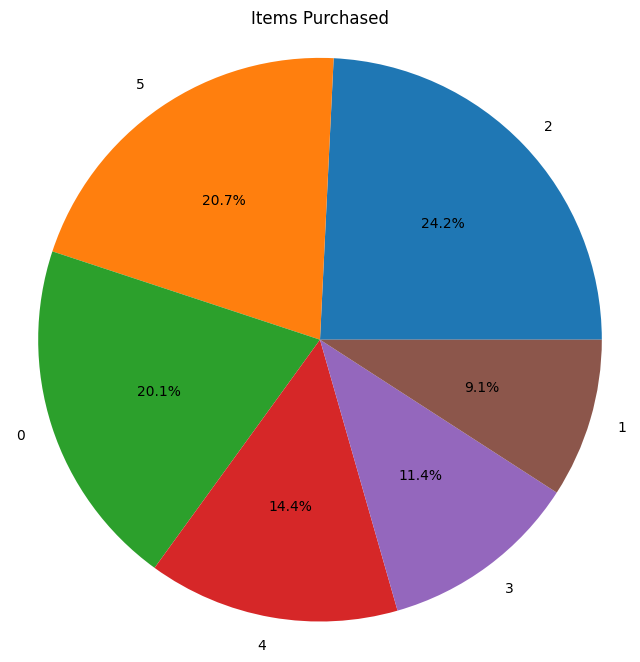

In [30]:
plt.figure(figsize=(8, 8))
plt.pie(count_items_purchased['count'], labels=count_items_purchased['buyid'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Items Purchased')
plt.show()

top 10 users that  isHit=1

In [31]:
users_with_ishit = df_gameclicks.filter(col("isHit") == "1")

In [32]:
users_with_ishit.show()

+-------------------+-------+------+-------------+-----+------+---------+
|          timestamp|clickId|userId|userSessionId|isHit|teamId|teamLevel|
+-------------------+-------+------+-------------+-----+------+---------+
|2016-05-26 15:14:21|    159|  1485|         5732|    1|    51|        1|
|2016-05-26 15:15:51|    255|   872|         5815|    1|    74|        1|
|2016-05-26 15:22:47|    106|  1038|         5916|    1|    25|        1|
|2016-05-26 15:22:59|    228|  1665|         5953|    1|    70|        1|
|2016-05-26 15:23:27|    144|   812|         5648|    1|    36|        1|
|2016-05-26 15:24:27|    321|   437|         5904|    1|    97|        1|
|2016-05-26 15:25:41|     15|  2314|         5818|    1|     8|        1|
|2016-05-26 15:29:29|     18|   371|         5870|    1|     9|        1|
|2016-05-26 15:31:15|    170|  2355|         5671|    1|    59|        1|
|2016-05-26 15:31:43|    161|   539|         5873|    1|    53|        1|
|2016-05-26 15:31:53|    260|   253|  

In [33]:
count_ishit= users_with_ishit.groupBy('userId').count().orderBy(col('count').desc())
count_ishit.show()

+------+-----+
|userId|count|
+------+-----+
|  1418|  411|
|   436|  400|
|  2356|  322|
|  1000|  299|
|   911|  275|
|  1249|  255|
|   375|  255|
|   399|  242|
|  1477|  232|
|  1809|  220|
|  1019|  212|
|    16|  209|
|  1815|  207|
|  2307|  206|
|  1016|  206|
|  1634|  205|
|   754|  202|
|  2128|  198|
|  1317|  196|
|    10|  192|
+------+-----+
only showing top 20 rows



In [34]:
count_ishit= users_with_ishit.groupBy('userId').count().orderBy(col('count').desc()).toPandas()


In [35]:
top_10_ishit= count_ishit.head(10)
top_10_ishit

,userId,count
0,1418,411
1,436,400
2,2356,322
3,1000,299
4,911,275
5,375,255
6,1249,255
7,399,242
8,1477,232
9,1809,220


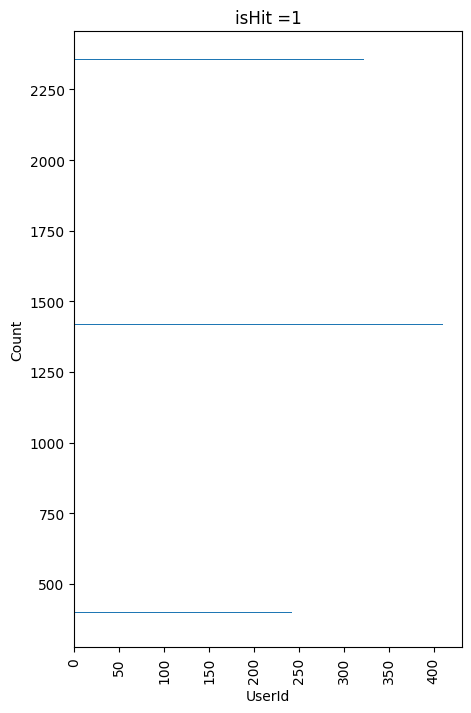

In [36]:
# Plot the bar chart
plt.figure(figsize=(5, 8))
plt.barh(top_10_ishit['userId'], top_10_ishit['count'])
plt.xlabel('UserId')
plt.ylabel('Count')
plt.title('isHit =1')
plt.xticks(rotation=90)
plt.show()

In [37]:
count_end_start= df_level.groupBy('eventType').count().orderBy(col('count').desc()).toPandas()


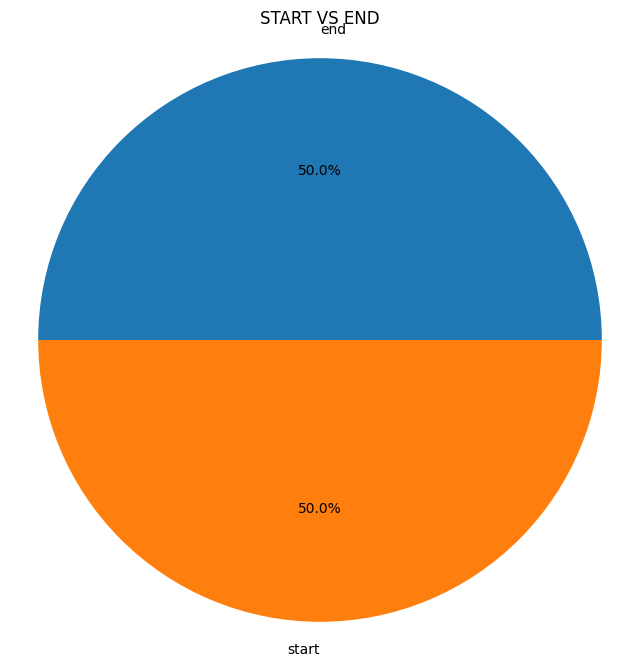

In [38]:
plt.figure(figsize=(8, 8))
plt.pie(count_end_start['count'], labels=count_end_start['eventType'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('START VS END')
plt.show()

note: below code illustrates that they are 109 teams and only 51 teams were able to complete level 7, hence it should be the hardest level

In [39]:
level_end = df_level.filter(col("eventType") == "end")

In [40]:
count_teams_ended= level_end.groupBy('teamid').count().orderBy(col('count').desc()).toPandas()


In [41]:
count_levels_end= level_end.groupBy('teamlevel').count().orderBy(col('count').desc()).toPandas()


In [42]:
count_levels_end

,teamlevel,count
0,1,109
1,2,107
2,3,105
3,4,96
4,5,85
5,6,74
6,7,51


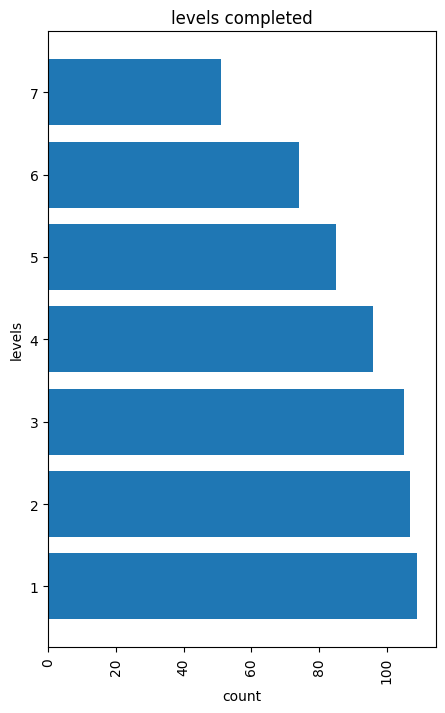

In [43]:
# Plot the bar chart
plt.figure(figsize=(5, 8))
plt.barh(count_levels_end['teamlevel'], count_levels_end['count'])
plt.xlabel('count')
plt.ylabel('levels')
plt.title('levels completed')
plt.xticks(rotation=90)
plt.show()

below we will find the 10 strongest team

In [45]:
from pyspark.sql.functions import desc


In [48]:
sort_column ='strength'
soreted_df = df_team.orderBy(desc(sort_column)).toPandas()

In [49]:
top10_strength= soreted_df.head(10)

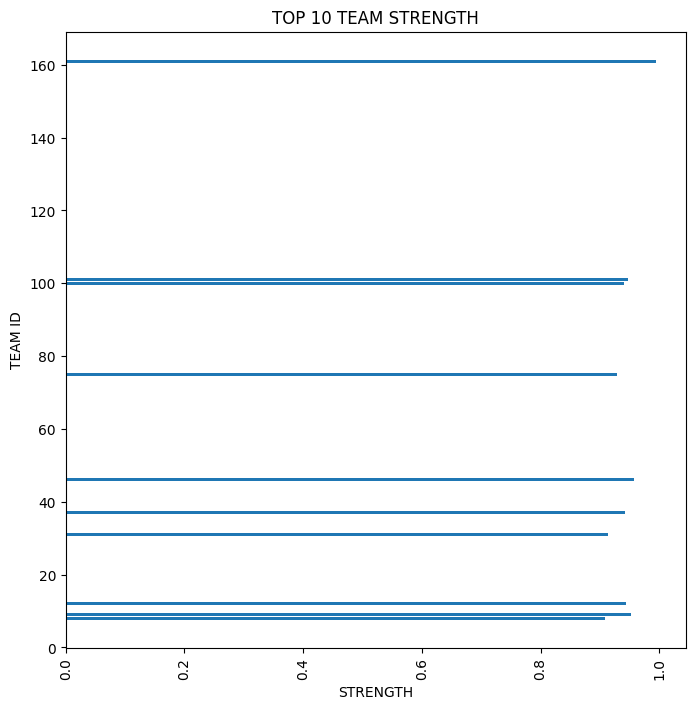

In [53]:
# Plot the bar chart
plt.figure(figsize=(8, 8))
plt.barh(top10_strength['teamId'], top10_strength['strength'])
plt.xlabel('STRENGTH')
plt.ylabel('TEAM ID')
plt.title('TOP 10 TEAM STRENGTH')
plt.xticks(rotation=90)
plt.show()

CLASSIFICATION

WE ARE GOING TO PREDICT USERS THAT CLICK ON GAMES ADD

In [15]:
#create a new column where all adcategories will be "1" if it is a game ad and "0" if it is not 
class_df = df_adclicks.withColumn('gamecat', when(col('adCategory') == 'games', 1).otherwise(0))

# Show the new DataFrame
class_df.show()


+-------------------+----+-------------+------+------+----+-----------+-------+
|          timestamp|txId|userSessionId|teamId|userId|adId| adCategory|gamecat|
+-------------------+----+-------------+------+------+----+-----------+-------+
|2016-05-26 15:13:22|5974|         5809|    27|   611|   2|electronics|      0|
|2016-05-26 15:17:24|5976|         5705|    18|  1874|  21|     movies|      0|
|2016-05-26 15:22:52|5978|         5791|    53|  2139|  25|  computers|      0|
|2016-05-26 15:22:57|5973|         5756|    63|   212|  10|    fashion|      0|
|2016-05-26 15:22:58|5980|         5920|     9|  1027|  20|   clothing|      0|
|2016-05-26 15:27:19|5977|         5954|    77|   595|   4|      games|      1|
|2016-05-26 15:28:51|5981|         5674|    54|   770|   6|     movies|      0|
|2016-05-26 15:35:25|5975|         5919|    59|  2133|   3|electronics|      0|
|2016-05-26 15:35:37|5979|         5945|    75|   253|   3|electronics|      0|
|2016-05-26 15:36:38|5972|         5914|

In [16]:
class_df = class_df.join(df_users, on='userId', how='inner')

# Show the resulting DataFrame
class_df.show()

+------+-------------------+----+-------------+------+----+-----------+-------+-------------------+-----------+----------+----------+-------+
|userId|          timestamp|txId|userSessionId|teamId|adId| adCategory|gamecat|          timestamp|       nick|   twitter|       dob|country|
+------+-------------------+----+-------------+------+----+-----------+-------+-------------------+-----------+----------+----------+-------+
|   611|2016-05-26 15:13:22|5974|         5809|    27|   2|electronics|      0|2013-11-07 10:03:26|  jhCuajXsZ|   @brOYQM|1961-02-01|     NA|
|  1874|2016-05-26 15:17:24|5976|         5705|    18|  21|     movies|      0|2016-01-05 22:27:08|     jIwCVU|  @A1shU2G|1975-06-24|     SE|
|  2139|2016-05-26 15:22:52|5978|         5791|    53|  25|  computers|      0|2014-08-01 04:40:38|  EP2vwkWWd|  @iXZMohC|1960-04-29|     JP|
|   212|2016-05-26 15:22:57|5973|         5756|    63|  10|    fashion|      0|2015-03-21 11:32:17| CotUq3zaL2|  @9tQvp0F|1976-10-27|     TF|
|  102

In [17]:
#change dob to age then add it to the new dataframe as well as country and device columns and 
#covert dob to age as a new column
from pyspark.sql.functions import current_date, datediff, floor
# Calculate the age based on the current date
class_df = class_df.withColumn('dob', class_df['dob'].cast('date'))
class_df = class_df.withColumn('age', floor(datediff(current_date(), class_df['dob']) / 365.25))

# Show the updated DataFrame
class_df.show()

+------+-------------------+----+-------------+------+----+-----------+-------+-------------------+-----------+----------+----------+-------+---+
|userId|          timestamp|txId|userSessionId|teamId|adId| adCategory|gamecat|          timestamp|       nick|   twitter|       dob|country|age|
+------+-------------------+----+-------------+------+----+-----------+-------+-------------------+-----------+----------+----------+-------+---+
|   611|2016-05-26 15:13:22|5974|         5809|    27|   2|electronics|      0|2013-11-07 10:03:26|  jhCuajXsZ|   @brOYQM|1961-02-01|     NA| 62|
|  1874|2016-05-26 15:17:24|5976|         5705|    18|  21|     movies|      0|2016-01-05 22:27:08|     jIwCVU|  @A1shU2G|1975-06-24|     SE| 47|
|  2139|2016-05-26 15:22:52|5978|         5791|    53|  25|  computers|      0|2014-08-01 04:40:38|  EP2vwkWWd|  @iXZMohC|1960-04-29|     JP| 63|
|   212|2016-05-26 15:22:57|5973|         5756|    63|  10|    fashion|      0|2015-03-21 11:32:17| CotUq3zaL2|  @9tQvp0F|19

In [18]:
#drop twitter,txId, usersessionId, timestamp, nick, dob
class_df= class_df.drop('timestamp', 'userSessionId', 'dob', 'txid','nick','twitter')
#drop duplicates from userSession
class_df.dropDuplicates(['userId']).show()

+------+------+----+-----------+-------+-------+---+
|userId|teamId|adId| adCategory|gamecat|country|age|
+------+------+----+-----------+-------+-------+---+
|     1|    99|  23|    fashion|      0|     KM| 42|
|     8|   124|  17|      games|      1|     GQ| 29|
|     9|    97|  19|   clothing|      0|     SI| 66|
|    10|   131|   3|electronics|      0|     MK| 25|
|    12|    66|  29| automotive|      0|     AO| 28|
|    13|    78|  14|    fashion|      0|     HR| 75|
|    15|    74|   6|     movies|      0|     MM| 40|
|    21|     9|   4|      games|      1|     RU| 74|
|    26|   173|  10|    fashion|      0|     MM| 38|
|    27|    70|  15|     sports|      0|     LK| 71|
|    29|    20|  23|    fashion|      0|     AR| 58|
|    34|    69|  21|     movies|      0|     CU| 57|
|    36|    20|   7|   hardware|      0|     IR| 28|
|    38|   118|  14|    fashion|      0|     TW| 34|
|    41|   145|  17|      games|      1|     KZ| 43|
|    47|   104|  12|  computers|      0|     C

In [21]:
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.classification import DecisionTreeClassifier


# Select the feature columns and target column
feature_columns = ['age', 'userId','teamId','adId', 'country']
#feature_columns = ['age', 'userId','teamId', 'country']
  # Replace with your actual feature column names
target_column = 'gamecat'  # Replace with your actual target column name

# Create a StringIndexer to convert the categorical column to numerical indices
indexer = StringIndexer(inputCol='country', outputCol='country_index')
indexed_df = indexer.fit(class_df).transform(class_df)

# Create a OneHotEncoder to encode the categorical indices
encoder = OneHotEncoder(inputCols=['country_index'], outputCols=['country_encoded'])
encoded_df = encoder.fit(indexed_df).transform(indexed_df)

# Create a vector assembler to combine the feature columns into a single vector column
assembler = VectorAssembler(inputCols=['age', 'userId','teamId','adId', 'country_encoded'], outputCol='features')
assembled_df = assembler.transform(encoded_df)

# Split the data into training and testing sets
train_data, test_data = assembled_df.randomSplit([0.8, 0.2])  # Adjust the split ratio as needed

# Create the decision tree model
dt_model = DecisionTreeClassifier(featuresCol='features', labelCol=target_column)

# Train the decision tree model
dt_model = dt_model.fit(train_data)

# Make predictions on the test data
predictions = dt_model.transform(test_data)

# Show the predicted values
predictions.select('features', target_column, 'prediction').show(10)


+--------------------+-------+----------+
|            features|gamecat|prediction|
+--------------------+-------+----------+
|(229,[0,1,2,3,16]...|      0|       0.0|
|(229,[0,1,2,3,16]...|      0|       0.0|
|(229,[0,1,2,3,16]...|      0|       0.0|
|(229,[0,1,2,3,16]...|      0|       0.0|
|(229,[0,1,2,3,16]...|      0|       0.0|
|(229,[0,1,2,3,16]...|      0|       0.0|
|(229,[0,1,2,3,16]...|      0|       0.0|
|(229,[0,1,2,3,16]...|      0|       0.0|
|(229,[0,1,2,3,16]...|      1|       0.0|
|(229,[0,1,2,3,16]...|      0|       0.0|
+--------------------+-------+----------+
only showing top 10 rows



In [22]:
# Create a confusion matrix
predictions.groupBy('gamecat', 'prediction').count().show()

# Calculate the elements of the confusion matrix
TN = predictions.filter('prediction = 0 AND gamecat = prediction').count()
TP = predictions.filter('prediction = 1 AND gamecat = prediction').count()
FN = predictions.filter('prediction = 0 AND gamecat = 1').count()
FP = predictions.filter('prediction = 1 AND gamecat = 0').count()

# Accuracy measures the proportion of correct predictions
accuracy = (TN + TP) / (TN + TP + FN + FP)
print(accuracy)

+-------+----------+-----+
|gamecat|prediction|count|
+-------+----------+-----+
|      1|       0.0|  317|
|      0|       0.0| 2794|
|      1|       1.0|  183|
+-------+----------+-----+

0.9037644201578627


In [23]:
from pyspark.sql.functions import col

# Assuming you have a DataFrame called 'predictions' with 'prediction' and 'label' columns

# Compute the confusion matrix
confusion_matrix = predictions.groupBy('gamecat', 'prediction').count().orderBy('gamecat', 'prediction')

# Pivot the confusion matrix for better readability
confusion_matrix_pivot = confusion_matrix.groupBy('gamecat').pivot('prediction').sum('count').na.fill(0)

# Display the confusion matrix
print("Confusion Matrix:")
confusion_matrix_pivot.show()



Confusion Matrix:
+-------+----+---+
|gamecat| 0.0|1.0|
+-------+----+---+
|      1| 317|183|
|      0|2794|  0|
+-------+----+---+



CLUSTERING

In [24]:
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.clustering import KMeans

# Assuming you have a DataFrame called 'data' with feature columns including 'country'

# Select the feature columns
feature_columns_clustering = ['teamId', 'age', 'country','userId', 'adId']  # Replace with your actual feature column names
prediction_column = 'gamecat'

# Create a StringIndexer to convert the categorical column to numerical indices
indexer_clustering = StringIndexer(inputCol='country', outputCol='country_index')
indexed_data_clustering = indexer_clustering.fit(class_df).transform(class_df)

# Create a OneHotEncoder to encode the categorical indices
encoder_clustering = OneHotEncoder(inputCols=['country_index'], outputCols=['country_encoded'])
encoded_clustering = encoder_clustering.fit(indexed_data_clustering).transform(indexed_data_clustering)

# Create a vector assembler to combine the feature columns into a single vector column
assembler_clustering = VectorAssembler(inputCols=['age', 'userId','teamId','adId', 'country_encoded'], outputCol='features')
assembled_data_clustering = assembler_clustering.transform(encoded_clustering)



# Train the K-means model
k = 3  # Number of clusters
kmeans = KMeans(featuresCol='features', predictionCol='clusters', k=k, seed=11)
model = kmeans.fit(assembled_data_clustering)

# Make predictions on the data
predictions_clustering = model.transform(assembled_data_clustering)

from pyspark.ml.evaluation import ClusteringEvaluator
evaluator = ClusteringEvaluator(featuresCol='features', predictionCol='clusters', metricName='silhouette')
silhouette_score = evaluator.evaluate(predictions_clustering)

print("Silhouette Score: ", silhouette_score)

# Show the predicted cluster for each data point
predictions_clustering.select('features', 'clusters').show()


Silhouette Score:  0.7532475572081742
+--------------------+--------+
|            features|clusters|
+--------------------+--------+
|(229,[0,1,2,3,88]...|       2|
|(229,[0,1,2,3,157...|       0|
|(229,[0,1,2,3,55]...|       0|
|(229,[0,1,2,3,140...|       2|
|(229,[0,1,2,3,12]...|       1|
|(229,[0,1,2,3,59]...|       2|
|(229,[0,1,2,3,99]...|       1|
|(229,[0,1,2,3,16]...|       0|
|(229,[0,1,2,3,28]...|       2|
|(229,[0,1,2,3,10]...|       0|
|(229,[0,1,2,3,10]...|       0|
|(229,[0,1,2,3,4],...|       1|
|(229,[0,1,2,3,157...|       0|
|(229,[0,1,2,3,9],...|       2|
|(229,[0,1,2,12],[...|       1|
|(229,[0,1,2,3,4],...|       1|
|(229,[0,1,2,3,23]...|       1|
|(229,[0,1,2,3,223...|       2|
|(229,[0,1,2,3,28]...|       2|
|(229,[0,1,2,3,178...|       2|
+--------------------+--------+
only showing top 20 rows



GRAPH ANALYSIS